In [1]:
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
from pprint import pprint

In [2]:
csv_data = "../ETL/miami_df_final.csv"
miami_df = pd.read_csv(csv_data)

In [3]:
cols = ["neighborhood", "br", "ba", "sqft", "housingType", "laundry", "parking", "cats", "dogs",\
       "furnished", "rent"]
miami_df = miami_df[cols].copy()
miami_df

,neighborhood,br,ba,sqft,housingType,laundry,parking,cats,dogs,furnished,rent
0,Dadeland,2,2.0,NaN,apartment,w/d in unit,carport,no,no,no,1900
1,Doral,2,2.0,NaN,apartment,w/d in unit,attached garage,no,no,no,2557
2,Miami,2,2.0,1106.0,apartment,w/d in unit,off-street parking,yes,yes,no,2241
3,Doral,3,2.0,NaN,apartment,w/d in unit,attached garage,no,no,no,3399
4,Doral,1,1.0,NaN,apartment,w/d in unit,attached garage,no,no,no,1978
...,...,...,...,...,...,...,...,...,...,...,...
1831,Miami,1,1.0,NaN,apartment,w/d in unit,carport,no,no,no,1950
1832,Miami Beach,2,2.0,1300.0,apartment,w/d in unit,carport,no,no,no,2500
1833,Kendall,2,2.0,NaN,apartment,w/d in unit,carport,no,no,no,1500
1834,Fontainebleau,2,2.5,NaN,apartment,w/d in unit,carport,no,no,no,1700


In [4]:
miami_df.describe()

,br,ba,sqft,rent
count,1836.000000,1833.000000,616.000000,1836.000000
mean,1.735294,1.695035,1021.472403,2016.338235
std,0.774721,0.550915,413.481218,799.370174
min,0.000000,1.000000,235.000000,500.000000
25%,1.000000,1.000000,741.500000,1500.000000
50%,2.000000,2.000000,950.000000,1800.000000
75%,2.000000,2.000000,1250.000000,2250.000000
max,5.000000,4.500000,2921.000000,4950.000000


In [5]:
# replace Nan values in miami_df['sqft']
miami_df['sqft'] = miami_df['sqft'].apply(str)
miami_df.loc[miami_df['sqft'].str.contains('nan'), 'sqft'] = "0"
miami_df['sqft'] = pd.to_numeric(miami_df['sqft'])

# replace NaN in miami_df['ba']
miami_df['ba'] = miami_df['ba'].apply(str)
miami_df.loc[miami_df['ba'].str.contains('nan'), 'ba'] = "0"
miami_df['ba'] = pd.to_numeric(miami_df['ba'])
miami_df

miami_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1836 entries, 0 to 1835
Data columns (total 11 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   neighborhood  1836 non-null   object 
 1   br            1836 non-null   int64  
 2   ba            1836 non-null   float64
 3   sqft          1836 non-null   float64
 4   housingType   1836 non-null   object 
 5   laundry       1836 non-null   object 
 6   parking       1836 non-null   object 
 7   cats          1836 non-null   object 
 8   dogs          1836 non-null   object 
 9   furnished     1836 non-null   object 
 10  rent          1836 non-null   int64  
dtypes: float64(2), int64(2), object(7)
memory usage: 157.9+ KB


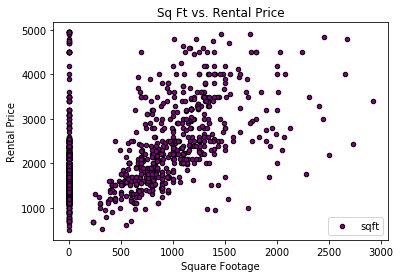

In [6]:
plt.figure()
plt.scatter(miami_df['sqft'],miami_df['rent'], s=20, edgecolor="black",c="purple", label="sqft")
plt.xlabel("Square Footage")
plt.ylabel("Rental Price")
plt.title("Sq Ft vs. Rental Price")
plt.legend()
plt.show()

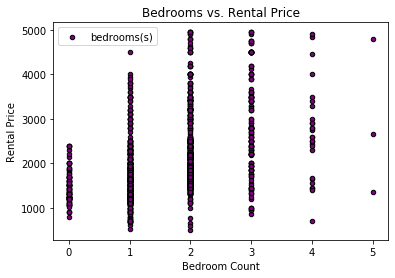

In [7]:
plt.figure()
plt.scatter(miami_df['br'],miami_df['rent'], s=20, edgecolor="black",c="purple", label="bedrooms(s)")
plt.xlabel("Bedroom Count")
plt.ylabel("Rental Price")
plt.title("Bedrooms vs. Rental Price")
plt.legend()
plt.show()

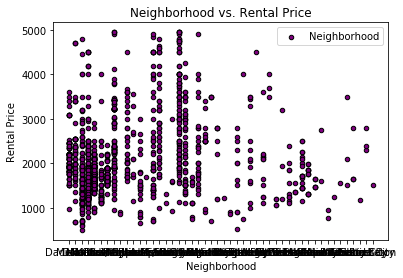

In [8]:
plt.figure()
plt.scatter(miami_df['neighborhood'],miami_df['rent'], s=20, edgecolor="black",c="purple", label="Neighborhood")
plt.xlabel("Neighborhood")
plt.ylabel("Rental Price")
plt.title("Neighborhood vs. Rental Price")
plt.legend()
plt.show()

In [9]:
def getCorrelatedFeature(corrMatrix, threshold):
    feature = []
    value = []
    
    for i, index in enumerate(corrMatrix.index):
        if abs(corrMatrix[index]) > threshold:
            feature.append(index)
            value.append(corrMatrix[index])
            
    df = pd.DataFrame(data = value, index = feature, columns = ['Corr Value'])
    return df

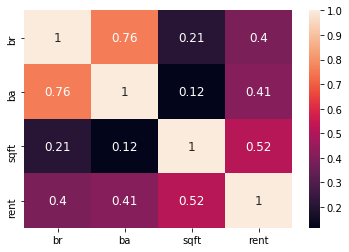

In [10]:
import seaborn as sn
## keep only numerical columns
X_1 = miami_df[["neighborhood", "br", "ba", "sqft", "housingType", "laundry", "parking", "cats", "dogs", "furnished", "rent"]]
## correlation matrix
corrMatrix = X_1.corr()
## visualize it in a heatmap
sn.heatmap(corrMatrix, annot=True, annot_kws={'size': 12})
plt.show()

In [11]:
threshold = 0.40
corr_value = getCorrelatedFeature(corrMatrix['rent'], threshold)
corr_value

,Corr Value
ba,0.414904
sqft,0.515150
rent,1.000000


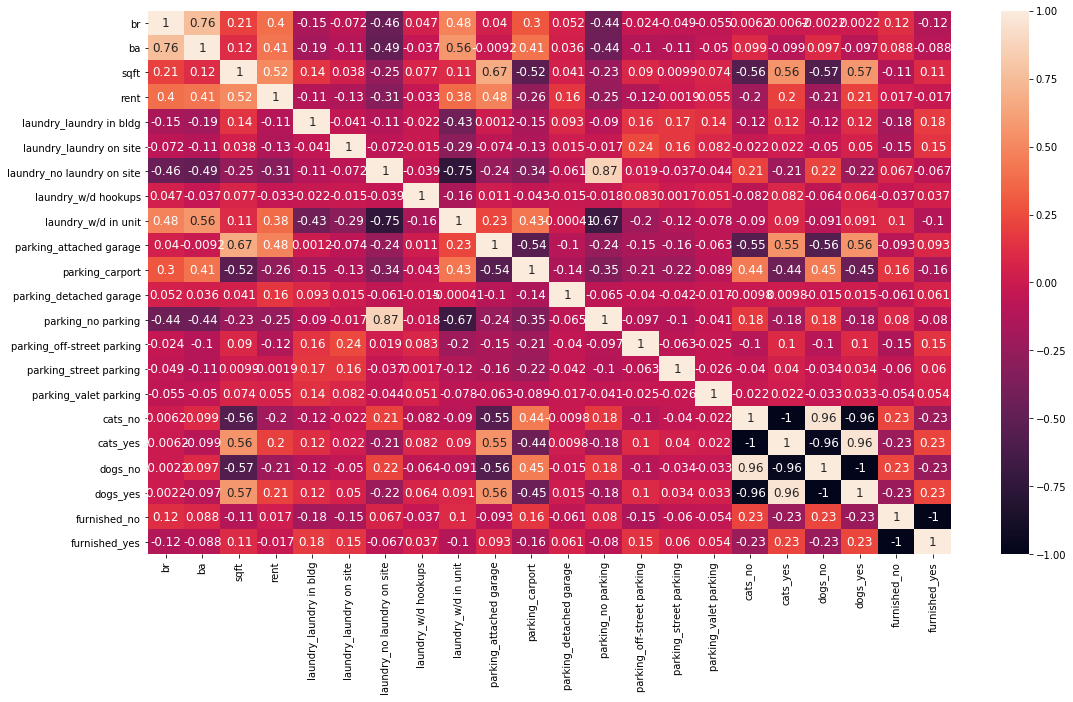

In [12]:
import seaborn as sn
## keep only numerical columns
X_2 = pd.get_dummies(miami_df[["br", "ba", "sqft", "laundry", "parking", "cats", "dogs", "furnished", "rent"]])
## correlation matrix
corrMatrix = X_2.corr()
## visualize it in a heatmap
fig, ax = plt.subplots(figsize = (18,10))
sn.heatmap(corrMatrix, annot=True, annot_kws={'size': 12})
plt.show()

In [13]:
threshold = 0.40
corr_value = getCorrelatedFeature(corrMatrix['rent'], threshold)
corr_value

,Corr Value
ba,0.414904
sqft,0.515150
rent,1.000000
parking_attached garage,0.477438


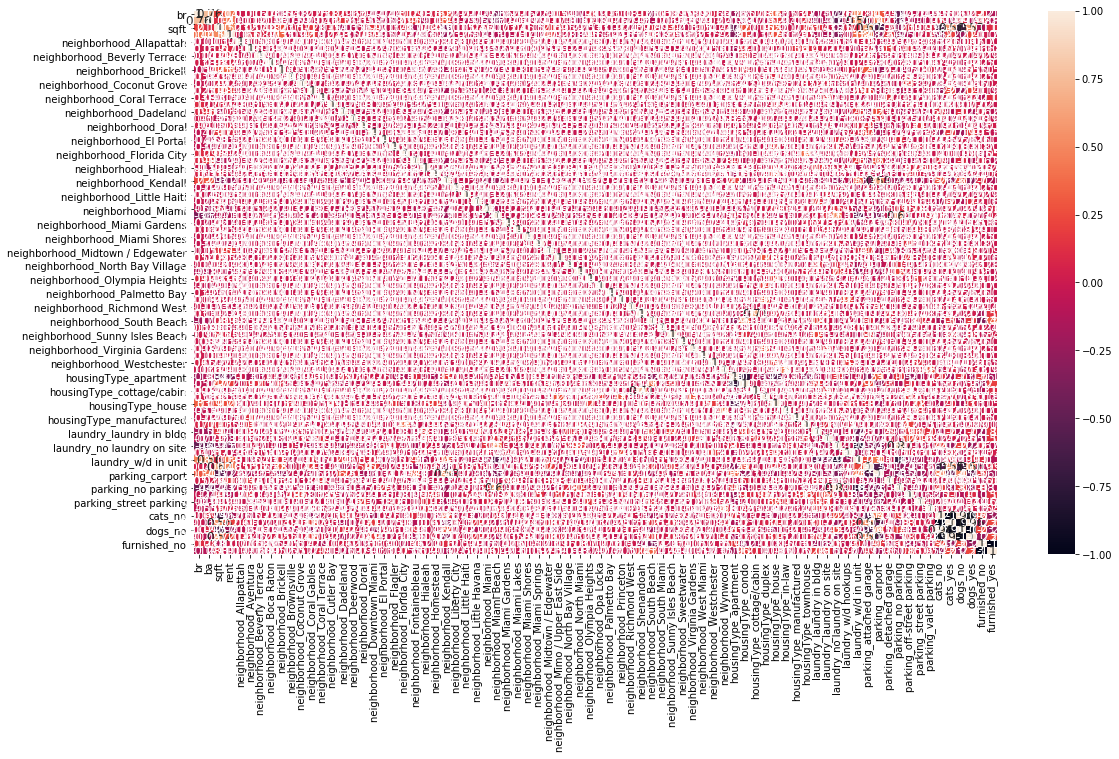

In [14]:
import seaborn as sn
## keep only numerical columns
X_3 = pd.get_dummies(miami_df)
## correlation matrix
corrMatrix = X_3.corr()
## visualize it in a heatmap
fig, ax = plt.subplots(figsize = (18,10))
sn.heatmap(corrMatrix, annot=True, annot_kws={'size': 12})
plt.show()

In [15]:
threshold = 0.30
corr_value = getCorrelatedFeature(corrMatrix['rent'], threshold)
corr_value

,Corr Value
br,0.395210
ba,0.414904
sqft,0.515150
rent,1.000000
neighborhood_Brickell,0.348267
housingType_apartment,-0.311551
laundry_no laundry on site,-0.312909
laundry_w/d in unit,0.379508
parking_attached garage,0.477438


In [16]:
corr_value.index

Index(['br', 'ba', 'sqft', 'rent', 'neighborhood_Brickell',
       'housingType_apartment', 'laundry_no laundry on site',
       'laundry_w/d in unit', 'parking_attached garage'],
      dtype='object')

In [18]:
# correlated_data = pd.get_dummies(miami_df[["neighborhood", "br", "ba", "sqft", "housingType", "laundry", "parking", "cats", "dogs", "furnished"]])

correlated_data = X_3[['br', 'ba', 'sqft', 'neighborhood_Brickell',
       'housingType_apartment', 'laundry_no laundry on site',
       'laundry_w/d in unit', 'parking_attached garage']]
correlated_data

,br,ba,sqft,neighborhood_Brickell,housingType_apartment,laundry_no laundry on site,laundry_w/d in unit,parking_attached garage
0,2,2.0,0.0,0,1,0,1,0
1,2,2.0,0.0,0,1,0,1,1
2,2,2.0,1106.0,0,1,0,1,0
3,3,2.0,0.0,0,1,0,1,1
4,1,1.0,0.0,0,1,0,1,1
...,...,...,...,...,...,...,...,...
1831,1,1.0,0.0,0,1,0,1,0
1832,2,2.0,1300.0,0,1,0,1,0
1833,2,2.0,0.0,0,1,0,1,0
1834,2,2.5,0.0,0,1,0,1,0


## Data Preprocessing

In [24]:
X = pd.get_dummies(miami_df[["neighborhood", "br", "ba", "sqft", "housingType", "laundry", "parking", "cats", "dogs", "furnished"]])
y = miami_df["rent"].values.reshape(-1, 1)
print(X.shape, y.shape)
X

(1836, 77) (1836, 1)


,br,ba,sqft,neighborhood_Allapattah,neighborhood_Aventura,neighborhood_Beverly Terrace,neighborhood_Boca Raton,neighborhood_Brickell,neighborhood_Brownsville,neighborhood_Coconut Grove,...,parking_no parking,parking_off-street parking,parking_street parking,parking_valet parking,cats_no,cats_yes,dogs_no,dogs_yes,furnished_no,furnished_yes
0,2,2.0,0.0,0,0,0,0,0,0,0,...,0,0,0,0,1,0,1,0,1,0
1,2,2.0,0.0,0,0,0,0,0,0,0,...,0,0,0,0,1,0,1,0,1,0
2,2,2.0,1106.0,0,0,0,0,0,0,0,...,0,1,0,0,0,1,0,1,1,0
3,3,2.0,0.0,0,0,0,0,0,0,0,...,0,0,0,0,1,0,1,0,1,0
4,1,1.0,0.0,0,0,0,0,0,0,0,...,0,0,0,0,1,0,1,0,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1831,1,1.0,0.0,0,0,0,0,0,0,0,...,0,0,0,0,1,0,1,0,1,0
1832,2,2.0,1300.0,0,0,0,0,0,0,0,...,0,0,0,0,1,0,1,0,1,0
1833,2,2.0,0.0,0,0,0,0,0,0,0,...,0,0,0,0,1,0,1,0,1,0
1834,2,2.5,0.0,0,0,0,0,0,0,0,...,0,0,0,0,1,0,1,0,1,0


In [25]:
# most accepted rule of thumb is that we should have at least 5 training data points for every feature in our dataset
training_data_set = 1836*0.8
ration = training_data_set/77
ration

19.075324675324676

In [29]:
target = np.array(miami_df['rent'])
features = X
feature_list = list(features.columns)
features = np.array(features)

## RANDOM FOREST - KFOLD AND MODEL 


from sklearn.model_selection import KFold
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_squared_error
    
kf = KFold(n_splits=10,random_state=42,shuffle=True)
accuracies = []
mse_ = []
r2_ = []

for train_index, test_index in kf.split(features):

    X_train   = features[train_index]
    y_train = target[train_index]

    X_test    = features[test_index]
    y_test  = target[test_index]

    rf = RandomForestRegressor(n_estimators = 1000, 
                               random_state = 42, 
                               criterion = 'mse',
                               bootstrap=True)
    
    rf.fit(X_train, y_train)

    predictions = rf.predict(X_test)

    errors = abs(predictions - y_test)

    print('Mean Absolute Error:', round(np.mean(errors), 2))
    
    mape = 100 * (errors / y_test)
    accuracy = 100 - np.mean(mape)
    print('Accuracy:', round(accuracy, 2), '%')
    
    MSE = mean_squared_error(y_test, predictions)
    r2 = rf.score(X_test, y_test)
    print(f'MSE: {round(MSE, 2)}')
    print(f'R2: {round(r2, 2)}')
    print('------------------')

    accuracies.append(accuracy)
    mse_.append(MSE)
    r2_.append(r2)

average_accuracy = np.mean(accuracies)
average_mse = np.mean(mse_)
average_r2 = np.mean(r2_)
print('Average accuracy:', average_accuracy)
print('Average MSE:', average_mse)
print('Average R2:', average_r2)

Mean Absolute Error: 210.08
Accuracy: 88.67 %
MSE: 93558.78
R2: 0.86
------------------
Mean Absolute Error: 235.1
Accuracy: 86.15 %
MSE: 101808.67
R2: 0.76
------------------
Mean Absolute Error: 265.72
Accuracy: 86.3 %
MSE: 158779.93
R2: 0.75
------------------
Mean Absolute Error: 268.6
Accuracy: 85.86 %
MSE: 186088.41
R2: 0.75
------------------
Mean Absolute Error: 254.63
Accuracy: 86.6 %
MSE: 150140.57
R2: 0.78
------------------
Mean Absolute Error: 261.06
Accuracy: 86.14 %
MSE: 153163.23
R2: 0.77
------------------
Mean Absolute Error: 274.33
Accuracy: 86.18 %
MSE: 167563.26
R2: 0.74
------------------
Mean Absolute Error: 268.12
Accuracy: 85.83 %
MSE: 209252.88
R2: 0.64
------------------
Mean Absolute Error: 264.02
Accuracy: 87.47 %
MSE: 166414.56
R2: 0.79
------------------
Mean Absolute Error: 240.2
Accuracy: 86.66 %
MSE: 154658.63
R2: 0.71
------------------
Average accuracy: 86.5867767072576
Average MSE: 154142.8931653903
Average R2: 0.7539908621026683


In [30]:
# Hyperparameter Tuning the Random Forest

from sklearn.model_selection import RandomizedSearchCV
# Number of trees in random forest
n_estimators = [int(x) for x in np.linspace(start = 200, stop = 2000, num = 10)]
# Number of features to consider at every split
max_features = ['auto', 'sqrt']
# Maximum number of levels in tree
max_depth = [int(x) for x in np.linspace(10, 110, num = 11)]
max_depth.append(None)
# Minimum number of samples required to split a node
min_samples_split = [2, 5, 10]
# Minimum number of samples required at each leaf node
min_samples_leaf = [1, 2, 4]
# Method of selecting samples for training each tree
bootstrap = [True, False]
# Create the random grid
random_grid = {'n_estimators': n_estimators,
               'max_features': max_features,
               'max_depth': max_depth,
               'min_samples_split': min_samples_split,
               'min_samples_leaf': min_samples_leaf,
               'bootstrap': bootstrap}
pprint(random_grid)

{'bootstrap': [True, False],
 'max_depth': [10, 20, 30, 40, 50, 60, 70, 80, 90, 100, 110, None],
 'max_features': ['auto', 'sqrt'],
 'min_samples_leaf': [1, 2, 4],
 'min_samples_split': [2, 5, 10],
 'n_estimators': [200, 400, 600, 800, 1000, 1200, 1400, 1600, 1800, 2000]}


In [31]:
# Use the random grid to search for best hyperparameters
# First create the base model to tune
rf2 = RandomForestRegressor()
# Random search of parameters, using 3 fold cross validation, 
# search across 100 different combinations, and use all available cores
rf_random = RandomizedSearchCV(estimator = rf2, param_distributions = random_grid, n_iter = 100, cv = 3, verbose=2, random_state=42, n_jobs = -1)
# Fit the random search model
rf_random.fit(X_train, y_train)

print(rf_random.best_params_)

Fitting 3 folds for each of 100 candidates, totalling 300 fits
{'n_estimators': 200, 'min_samples_split': 2, 'min_samples_leaf': 1, 'max_features': 'sqrt', 'max_depth': 50, 'bootstrap': True}


In [32]:
# go back to the original code and include new parameters

## RANDOM FOREST - KFOLD AND MODEL 

from sklearn.model_selection import KFold
from sklearn.ensemble import RandomForestRegressor
    
kf = KFold(n_splits=10,random_state=42,shuffle=True)
accuracies = []
for train_index, test_index in kf.split(features):

    X_train   = features[train_index]
    y_train = target[train_index]

    X_test    = features[test_index]
    y_test  = target[test_index]

    rf2 = RandomForestRegressor(n_estimators = 200, 
                               random_state = 42, 
                               criterion = 'mse',
                               min_samples_leaf = 1,
                               min_samples_split = 2,
                               max_features = 'sqrt',
                               bootstrap = True,
                               max_depth = 50)
    
    rf2.fit(X_train, y_train)

    predictions = rf2.predict(X_test)

    errors = abs(predictions - y_test)

    print('Mean Absolute Error:', round(np.mean(errors), 2))
    
    mape = 100 * (errors / y_test)
    accuracy = 100 - np.mean(mape)
    print('Accuracy:', round(accuracy, 2), '%')
    
    MSE = mean_squared_error(y_test, predictions)
    r2 = rf2.score(X_test, y_test)
    print(f'MSE: {round(MSE, 2)}')
    print(f'R2: {round(r2, 2)}')
    print('------------------')

    accuracies.append(accuracy)
    mse_.append(MSE)
    r2_.append(r2)

average_accuracy = np.mean(accuracies)
average_mse = np.mean(mse_)
average_r2 = np.mean(r2_)
print('Average accuracy:', average_accuracy)
print('Average MSE:', average_mse)
print('Average R2:', average_r2)

Mean Absolute Error: 209.54
Accuracy: 88.53 %
MSE: 94238.91
R2: 0.86
------------------
Mean Absolute Error: 234.44
Accuracy: 85.87 %
MSE: 99763.36
R2: 0.76
------------------
Mean Absolute Error: 275.31
Accuracy: 85.55 %
MSE: 180973.86
R2: 0.72
------------------
Mean Absolute Error: 269.7
Accuracy: 85.93 %
MSE: 167015.47
R2: 0.78
------------------
Mean Absolute Error: 256.9
Accuracy: 86.53 %
MSE: 152126.47
R2: 0.77
------------------
Mean Absolute Error: 248.74
Accuracy: 87.07 %
MSE: 141971.62
R2: 0.79
------------------
Mean Absolute Error: 271.74
Accuracy: 85.99 %
MSE: 157332.36
R2: 0.75
------------------
Mean Absolute Error: 270.5
Accuracy: 85.57 %
MSE: 199414.19
R2: 0.66
------------------
Mean Absolute Error: 262.28
Accuracy: 87.02 %
MSE: 156086.31
R2: 0.8
------------------
Mean Absolute Error: 243.79
Accuracy: 86.16 %
MSE: 147605.61
R2: 0.72
------------------
Average accuracy: 86.42137916876611
Average MSE: 151897.85430462146
Average R2: 0.75738884764652


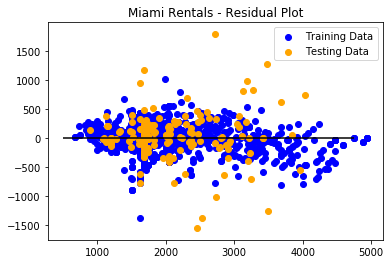

In [62]:
plt.scatter(rf2.predict(X_train), rf2.predict(X_train) - y_train, c="blue", label="Training Data")
plt.scatter(rf2.predict(X_test), rf2.predict(X_test) - y_test, c="orange", label="Testing Data")
plt.legend()
plt.hlines(y=0, xmin=y_test.min(), xmax=y_test.max())
plt.title("Miami Rentals - Residual Plot")
plt.show()

In [33]:
preds = rf.predict(X_test)

df = pd.DataFrame({'Predicted': preds, 'Actual': y_test, 'Abs Error': errors})
df

,Predicted,Actual,Abs Error
0,1681.382481,1600,80.776486
1,2916.854148,2400,330.593432
2,1681.382481,1700,19.223514
3,2065.335137,2900,616.074333
4,1734.253256,1750,14.589675
...,...,...,...
178,3281.797762,2700,374.280000
179,1608.918361,1650,37.432280
180,1832.768210,1650,148.950989
181,1681.382481,1550,130.776486


In [34]:
preds2 = rf2.predict(X_test)

df2 = pd.DataFrame({'Predicted': preds2, 'Actual': y_test, 'Abs Error': errors})
df2

,Predicted,Actual,Abs Error
0,1680.776486,1600,80.776486
1,2730.593432,2400,330.593432
2,1680.776486,1700,19.223514
3,2283.925667,2900,616.074333
4,1735.410325,1750,14.589675
...,...,...,...
178,3074.280000,2700,374.280000
179,1612.567720,1650,37.432280
180,1798.950989,1650,148.950989
181,1680.776486,1550,130.776486


In [35]:
# make predictions

# create a new dataframe that is indexed like the trained model
newdata = pd.DataFrame().reindex_like(X_4)
newdata = pd.DataFrame(newdata, index=[0])
newdata.fillna(value=0, inplace=True)

# insert information about your apartment 
newdata['br'] = 1
newdata['ba'] = 1
newdata['sqft'] = 660

rf.predict(newdata)

array([1248.19951042])

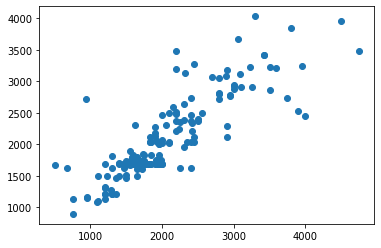

In [36]:
plt.scatter(y_test, predictions)

In [41]:
# get feature importances
importance = rf2.feature_importances_

feature_indexes_by_importance = importance.argsort()
for index in feature_indexes_by_importance:
    print('{} : {}'.format(X.columns[index], (importance[index] )))

housingType_manufactured : 0.0
neighborhood_Princeton : 2.511442237716272e-05
neighborhood_Wynwood : 4.453638135640919e-05
neighborhood_Virginia Gardens : 5.330904427818541e-05
neighborhood_Liberty City : 5.422094339491049e-05
neighborhood_Brownsville : 7.019426181275119e-05
neighborhood_Miami Shores : 0.00011315086588018175
neighborhood_Allapattah : 0.00011469722050879981
neighborhood_Shenandoah : 0.0001443773960834232
housingType_cottage/cabin : 0.00014825733596850966
neighborhood_Miami Springs : 0.00016022748107598106
housingType_in-law : 0.0001650523941730189
neighborhood_El Portal : 0.0002829713771659399
neighborhood_Coral Terrace : 0.00032014139568896133
neighborhood_Opa Locka : 0.00036133702474266965
neighborhood_Little Haiti : 0.00037639347501471353
neighborhood_Miami Lakes : 0.0004301189919255192
neighborhood_Florida City : 0.0004497788036665178
neighborhood_Flagler : 0.00046358113349407
neighborhood_Richmond West : 0.0004874604072782649
neighborhood_West Miami : 0.00055403457

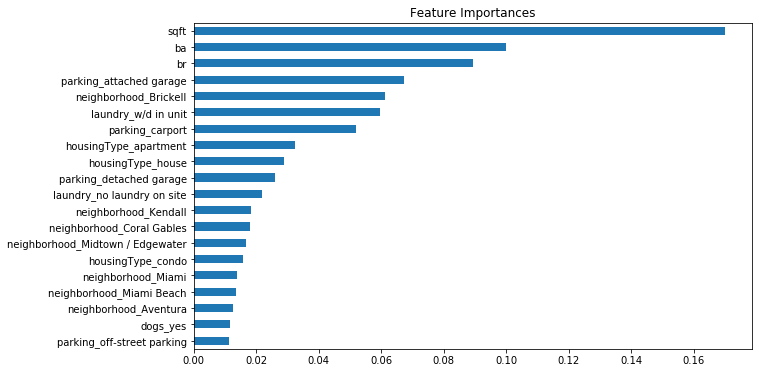

In [60]:
plt.figure(figsize=(10,6))
plt.title("Feature Importances")
feat_importances = pd.Series(importance, index=X.columns)
# feat_importances.sort_values(ascending = True).plot(kind="barh", color="Blue")
feat_importances.nlargest(20).sort_values(ascending = True).plot(kind='barh') # top 20 features only